In [ ]:
#EQUIPMENT
import pandas as pd
from prettytable import PrettyTable

df_equipment_dirty = pd.read_csv(r'C:\Users\allen\Desktop\SYNOPSIS CHALLENGE\synapsis ai engineer challege datasets\equipment_sensors.csv')

df_equipment = df_equipment_dirty.map(lambda x: x if pd.notna(x) else "unknown")

df_equipment["timestamp"] = pd.to_datetime(df_equipment_dirty["timestamp"])
df_equipment["equipment_id"] = df_equipment_dirty["equipment_id"].astype('string')
df_equipment["status"] = df_equipment_dirty["status"].astype('string')
df_equipment["fuel_consumption"] = pd.to_numeric(df_equipment_dirty["fuel_consumption"])
df_equipment["maintenance_alert"] = df_equipment_dirty["maintenance_alert"].astype('bool')

df_equipment['date_only'] = df_equipment['timestamp'].dt.date
#df_equipment['date_only'] = pd.to_datetime(df_equipment['date_only'])

#daily_total = df_equipment.groupby('date_only').size()
#daily_active = df_equipment[df_equipment["status"] == "active"].groupby('date_only').size()
#df_equipment["equipment_utilization"] = ((df_equipment["status"]=="active").groupby(df_equipment['date_only']).transform('sum'))

daily_total = df_equipment.groupby('date_only')['status'].count()
daily_active = df_equipment[df_equipment["status"] == "active"].groupby('date_only').size()

urate = round((daily_active/daily_total)*100,2)
df_equipment["equipment_utilization"] = df_equipment["date_only"].map(urate)

df_equipment["date_only"] = pd.to_datetime(df_equipment["date_only"])

#assert df_equipment['equipment_utilization'].between(0, 100).all()

#a = df_equipment.groupby(['date_only'])['status'].agg({'status':'count', 'fuel_consumption':'sum', 'maintenance_alert':'sum'}).reset_index()

#print(df_equipment.head(5))


#-----------------------------------------------------
table = PrettyTable()
table.field_names = df_equipment.columns.to_list()

for row in df_equipment.head(11).values.tolist():
    table.add_row(row)

print(table)

print(df_equipment.dtypes)




+---------------------+--------------+-------------+------------------+-------------------+---------------------+-----------------------+
|      timestamp      | equipment_id |    status   | fuel_consumption | maintenance_alert |      date_only      | equipment_utilization |
+---------------------+--------------+-------------+------------------+-------------------+---------------------+-----------------------+
| 2024-07-01 00:00:00 |    TR001     | maintenance |       0.0        |       False       | 2024-07-01 00:00:00 |         35.83         |
| 2024-07-01 00:00:00 |    TR002     |     idle    |       0.0        |       False       | 2024-07-01 00:00:00 |         35.83         |
| 2024-07-01 00:00:00 |    TR003     | maintenance |       0.0        |       False       | 2024-07-01 00:00:00 |         35.83         |
| 2024-07-01 00:00:00 |    TR004     |     idle    |       0.0        |       False       | 2024-07-01 00:00:00 |         35.83         |
| 2024-07-01 00:00:00 |    TR005  

In [149]:
#WEATHER
import requests
from prettytable import PrettyTable

url = 'https://api.open-meteo.com/v1/forecast?' \
'latitude=2.0167&longitude=117.3000' \
'&daily=temperature_2m_mean,precipitation_sum' \
'&timezone=Asia/Jakarta' \
'&past_days=0' \
'&start_date=2025-05-15' \
'&end_date=2025-07-31'

#print(requests.get(url).json())

df_weather = pd.DataFrame(requests.get(url).json()["daily"])

df_weather["time"] = pd.to_datetime(df_weather["time"])
df_weather["temperature_2m_mean"] = pd.to_numeric(df_weather["temperature_2m_mean"])
df_weather["precipitation_sum"] = pd.to_numeric(df_weather["precipitation_sum"])

#print(df_weather.head(4))
#print(df[df["time"] == df["time"].max()])

table = PrettyTable()
table.field_names = df_weather.columns.to_list()

for row in df_weather.head(11).values.tolist():
    table.add_row(row)

# Print the table
print(table)

print(df_weather.dtypes)


+---------------------+---------------------+-------------------+
|         time        | temperature_2m_mean | precipitation_sum |
+---------------------+---------------------+-------------------+
| 2025-05-15 00:00:00 |         26.0        |        7.2        |
| 2025-05-16 00:00:00 |         25.3        |        4.2        |
| 2025-05-17 00:00:00 |         25.9        |        9.6        |
| 2025-05-18 00:00:00 |         25.8        |        4.6        |
| 2025-05-19 00:00:00 |         26.8        |        10.0       |
| 2025-05-20 00:00:00 |         24.3        |        20.1       |
| 2025-05-21 00:00:00 |         24.8        |        5.3        |
| 2025-05-22 00:00:00 |         27.2        |        0.1        |
| 2025-05-23 00:00:00 |         27.7        |        6.7        |
| 2025-05-24 00:00:00 |         27.6        |        2.1        |
| 2025-05-25 00:00:00 |         28.1        |        1.8        |
+---------------------+---------------------+-------------------+
time      

In [264]:
#PRODCUTION

import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="G&*55gafy!dta6$E",
    database="coal_mining"
)

cursor = conn.cursor()

cursor.execute("""select 
p.date, 
p.mine_id,
sum(case when p.tons_extracted < 0 then 0 else p.tons_extracted end) as 'total_production_daily', 
round(avg(p.quality_grade), 2) as 'average_quality_grade'
-- count(distinct p.mine_id) as 'total_production_daily'
from production_logs p
left join mines m on m.mine_id = p.mine_id
group by p.date, p.mine_id;
               """)

rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df_prod = pd.DataFrame(rows, columns=columns)

df_prod["date"] = pd.to_datetime(df_prod["date"])
df_prod["total_production_daily"] = pd.to_numeric(df_prod["total_production_daily"])
df_prod["average_quality_grade"] = pd.to_numeric(df_prod["average_quality_grade"])

#print(df_prod.head(10))

#for row in cursor.fetchall():
 #   print(row)

table = PrettyTable()
table.field_names = df_prod.columns.to_list()

for row in df_prod.head(4).values.tolist():
    table.add_row(row)

print(table)

print(df_prod.dtypes)


+---------------------+---------+------------------------+-----------------------+
|         date        | mine_id | total_production_daily | average_quality_grade |
+---------------------+---------+------------------------+-----------------------+
| 2024-07-01 00:00:00 |    1    |         235.62         |          3.95         |
| 2024-07-01 00:00:00 |    2    |         485.72         |          4.65         |
| 2024-07-01 00:00:00 |    3    |         761.67         |          5.35         |
| 2024-07-02 00:00:00 |    1    |         793.23         |          3.55         |
+---------------------+---------+------------------------+-----------------------+
date                      datetime64[ns]
mine_id                            int64
total_production_daily           float64
average_quality_grade            float64
dtype: object


In [267]:
#MERGE 1 (PROD TO EQUIPMENT)

import pandas as pd
from prettytable import PrettyTable

merge_1 = pd.merge(df_prod, df_equipment, left_on='date', right_on='timestamp', how='inner')

#print(merge_1.head(4))

#----#

table = PrettyTable()
table.field_names = merge_1.columns.to_list()

for row in merge_1.head(21).values.tolist():
    table.add_row(row)

# Print the table
print(table)



+---------------------+---------+------------------------+-----------------------+---------------------+--------------+-------------+------------------+-------------------+---------------------+-----------------------+
|         date        | mine_id | total_production_daily | average_quality_grade |      timestamp      | equipment_id |    status   | fuel_consumption | maintenance_alert |      date_only      | equipment_utilization |
+---------------------+---------+------------------------+-----------------------+---------------------+--------------+-------------+------------------+-------------------+---------------------+-----------------------+
| 2024-07-01 00:00:00 |    1    |         235.62         |          3.95         | 2024-07-01 00:00:00 |    TR001     | maintenance |       0.0        |       False       | 2024-07-01 00:00:00 |         35.83         |
| 2024-07-01 00:00:00 |    1    |         235.62         |          3.95         | 2024-07-01 00:00:00 |    TR002     |     

In [ ]:

total_coal = merge_1.drop_duplicates(subset='date_only')['total_production_daily'].sum()

#total fuel
total_fuel = merge_1.groupby(['date_only'])['fuel_consumption'].sum()

#avg fuel
fuel_per_ton = round((total_fuel / total_coal),7)*10000

merge_1["fuel_per_ton"] = merge_1["date_only"].map(fuel_per_ton)

print(merge_1.head(6))
#print(f"Average fuel consumption per ton: {fuel_per_ton:.4f}")

        date  mine_id  total_production_daily  average_quality_grade  \
0 2024-07-01        1                  235.62                   3.95   
1 2024-07-01        1                  235.62                   3.95   
2 2024-07-01        1                  235.62                   3.95   
3 2024-07-01        1                  235.62                   3.95   
4 2024-07-01        1                  235.62                   3.95   
5 2024-07-01        2                  485.72                   4.65   

   timestamp equipment_id       status  fuel_consumption  maintenance_alert  \
0 2024-07-01        TR001  maintenance              0.00              False   
1 2024-07-01        TR002         idle              0.00              False   
2 2024-07-01        TR003  maintenance              0.00              False   
3 2024-07-01        TR004         idle              0.00              False   
4 2024-07-01        TR005       active              8.45              False   
5 2024-07-01        T

In [269]:
table = PrettyTable()
table.field_names = merge_1.columns.to_list()

for rows in merge_1.head(51).values.tolist():
   table.add_row(rows)

print(table)

+---------------------+---------+------------------------+-----------------------+---------------------+--------------+-------------+------------------+-------------------+---------------------+-----------------------+----------------------+
|         date        | mine_id | total_production_daily | average_quality_grade |      timestamp      | equipment_id |    status   | fuel_consumption | maintenance_alert |      date_only      | equipment_utilization |     fuel_per_ton     |
+---------------------+---------+------------------------+-----------------------+---------------------+--------------+-------------+------------------+-------------------+---------------------+-----------------------+----------------------+
| 2024-07-01 00:00:00 |    1    |         235.62         |          3.95         | 2024-07-01 00:00:00 |    TR001     | maintenance |       0.0        |       False       | 2024-07-01 00:00:00 |         35.83         |         1.21         |
| 2024-07-01 00:00:00 |    1    

In [220]:
#MERGE 2 (PROD TO WEATHER)

merge_2 = pd.merge(df_prod, df_weather, left_on='date', right_on='time', how='inner')

#print(merge_1.head(4))

#----#

table = PrettyTable()
table.field_names = merge_2.columns.to_list()

for row in merge_2.head(4).values.tolist():
    table.add_row(row)

print(table)

+---------------------+------------------------+-----------------------+---------------------+---------------------+-------------------+
|         date        | total_production_daily | average_quality_grade |         time        | temperature_2m_mean | precipitation_sum |
+---------------------+------------------------+-----------------------+---------------------+---------------------+-------------------+
| 2025-05-15 00:00:00 |         1801.4         |          4.58         | 2025-05-15 00:00:00 |         26.0        |        7.2        |
| 2025-05-16 00:00:00 |        1797.83         |          4.65         | 2025-05-16 00:00:00 |         25.3        |        4.2        |
| 2025-05-17 00:00:00 |        1719.32         |          4.63         | 2025-05-17 00:00:00 |         25.9        |        9.6        |
| 2025-05-18 00:00:00 |        1964.38         |          3.93         | 2025-05-18 00:00:00 |         25.8        |        4.6        |
+---------------------+------------------

In [253]:
merge_2['is_rainy'] = merge_2['precipitation_sum'] > 1.0

rainy_avg_current_month = merge_2[merge_2['is_rainy']].groupby(merge_2['time'].dt.to_period('M'))['total_production_daily'].mean()
non_rainy_avg_current_month = merge_2[~merge_2['is_rainy']].groupby('time')['total_production_daily'].mean()

#impact = rainy_avg - non_rainy_avg

merge_2["rainy_avg_current_month"] = merge_2['time'].dt.to_period('M').map(rainy_avg).round(2)
merge_2["non_rainy_avg_current_month"] = merge_2["time"].map(non_rainy_avg)
#merge_2 = merge_2.merge(impact.rename("impact"), on="time", how="left")


#print(f"Rainy day production vs. non-rainy: {impact:.2f} difference")


In [226]:
print(merge_2["time"].unique())
print("\n")
print(impact.index)

<DatetimeArray>
['2025-05-15 00:00:00', '2025-05-16 00:00:00', '2025-05-17 00:00:00',
 '2025-05-18 00:00:00', '2025-05-19 00:00:00', '2025-05-20 00:00:00',
 '2025-05-21 00:00:00', '2025-05-22 00:00:00', '2025-05-23 00:00:00',
 '2025-05-24 00:00:00', '2025-05-25 00:00:00', '2025-05-26 00:00:00',
 '2025-05-27 00:00:00', '2025-05-28 00:00:00', '2025-05-29 00:00:00',
 '2025-05-30 00:00:00', '2025-05-31 00:00:00', '2025-06-01 00:00:00',
 '2025-06-02 00:00:00', '2025-06-03 00:00:00', '2025-06-04 00:00:00',
 '2025-06-05 00:00:00', '2025-06-06 00:00:00', '2025-06-07 00:00:00',
 '2025-06-08 00:00:00', '2025-06-09 00:00:00', '2025-06-10 00:00:00',
 '2025-06-11 00:00:00', '2025-06-12 00:00:00', '2025-06-13 00:00:00',
 '2025-06-14 00:00:00', '2025-06-15 00:00:00', '2025-06-16 00:00:00',
 '2025-06-17 00:00:00', '2025-06-18 00:00:00', '2025-06-19 00:00:00',
 '2025-06-20 00:00:00', '2025-06-21 00:00:00', '2025-06-22 00:00:00',
 '2025-06-23 00:00:00', '2025-06-24 00:00:00', '2025-06-25 00:00:00',
 '20

In [259]:
table = PrettyTable()
table.field_names = merge_2.columns.to_list()

for row in merge_2.head(21).values.tolist():
    table.add_row(row)

print(table)

+---------------------+------------------------+-----------------------+---------------------+---------------------+-------------------+----------+-------------------------+-----------------------------+
|         date        | total_production_daily | average_quality_grade |         time        | temperature_2m_mean | precipitation_sum | is_rainy | rainy_avg_current_month | non_rainy_avg_current_month |
+---------------------+------------------------+-----------------------+---------------------+---------------------+-------------------+----------+-------------------------+-----------------------------+
| 2025-05-15 00:00:00 |         1801.4         |          4.58         | 2025-05-15 00:00:00 |         26.0        |        7.2        |   True   |         1784.94         |             nan             |
| 2025-05-16 00:00:00 |        1797.83         |          4.65         | 2025-05-16 00:00:00 |         25.3        |        4.2        |   True   |         1784.94         |           

In [258]:
merge_2.drop(columns=['non_rainy_avg'], inplace=True)

In [261]:
print(merge_1.dtypes)
print("\n")
print(merge_2.dtypes)


date                      datetime64[ns]
total_production_daily           float64
average_quality_grade            float64
timestamp                 datetime64[ns]
equipment_id              string[python]
status                    string[python]
fuel_consumption                 float64
maintenance_alert                   bool
date_only                 datetime64[ns]
equipment_utilization            float64
fuel_per_ton                     float64
dtype: object


date                           datetime64[ns]
total_production_daily                float64
average_quality_grade                 float64
time                           datetime64[ns]
temperature_2m_mean                   float64
precipitation_sum                     float64
is_rainy                                 bool
rainy_avg_current_month               float64
non_rainy_avg_current_month           float64
dtype: object


In [260]:
#Error log
import logging

logging.basicConfig(
    filename='log_error.txt',
    level=logging.ERROR,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

#total_production_daily is not negative
if not(df_prod['total_production_daily']>= 0).all() :
    logging.error("'total_production_daily' values is below 0.")
else:
    print("✅ All total_production_daily values are non-negative.")

#equipment_utilization between 0%-100%.
if not(df_equipment['equipment_utilization'].between(0, 100).all()) :
    logging.error("'equipment_utilization' values not between 0 and 100.")
else:
    print("✅ All equipment_utilization percentage are within range.")

#weather data is complete for each production day
if df_weather.isnull().any(axis=1).any():
    missing_rows = df_weather[df_weather.isnull().any(axis=1)]
    logging.error(f"Incomplete weather data found on production days:\n{missing_rows}")
else:
    print("✅ All weather data entries are complete for each production day.")


✅ All total_production_daily values are non-negative.
✅ All equipment_utilization percentage are within range.
✅ All weather data entries are complete for each production day.


In [270]:
#Loading data to clickhouse (prod_to_equipment)
import clickhouse_connect

if __name__ == '__main__':
    client = clickhouse_connect.get_client(
        host='ysfl410ir5.ap-southeast-1.aws.clickhouse.cloud',
        user='default',
        password='.4fEQpLWFkpXm',
        secure=True
    )
    
    #print("Result:", client.query("SELECT 1").result_set[0][0])
    client.command("""
        CREATE TABLE IF NOT EXISTS merged_prod_to_equipment(
                   date                            DateTime,
                   mine_id                            Int64,
                   total_production_daily           Float64,
                   average_quality_grade            Float64,
                   timestamp                       DateTime,
                   equipment_id                      String,
                   status                            String,
                   fuel_consumption                 Float64,
                   maintenance_alert                  UInt8,
                   date_only                       datetime,
                   equipment_utilization            Float64,
                   fuel_per_ton                     Float64
                   ) ENGINE = MergeTree()
                   ORDER BY date   
""")

client.insert_df('merged_prod_to_equipment', merge_1)


In [262]:
if __name__ == '__main__':
    client = clickhouse_connect.get_client(
        host='ysfl410ir5.ap-southeast-1.aws.clickhouse.cloud',
        user='default',
        password='.4fEQpLWFkpXm',
        secure=True
    )
    
    #print("Result:", client.query("SELECT 1").result_set[0][0])
    client.command("""
        CREATE TABLE IF NOT EXISTS merged_prod_to_weather(
                   date                            DateTime,
                   total_production_daily           Float64,
                   average_quality_grade            Float64,
                   time                            DateTime,
                   temperature_2m_mean              Float64,
                   precipitation_sum                Float64,
                   is_rainy                           UInt8,
                   rainy_avg_current_month          Float64,
                   non_rainy_avg_current_month      Float64
                   ) ENGINE = MergeTree()
                   ORDER BY date   
""")

client.insert_df('merged_prod_to_weather', merge_2)

In [271]:
import pandas as pd
import statsmodels.api as sm

# Aggregate by mine and date
aggregated = merge_1.groupby(['mine_id', 'date'])['total_production_daily'].mean().reset_index()

# Create a separate model per mine
for mine in aggregated['mine_id'].unique():
    data = aggregated[aggregated['mine_id'] == mine].set_index('date')['total_production_daily']
    
    # Fit a simple ARIMA model — you can tune order if needed
    model = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
    results = model.fit()
    
    # Forecast the next 10 days
    forecast = results.get_forecast(steps=10)
    print(f"\nMine ID: {mine}")
    print(forecast.predicted_mean)


Mine ID: 1
2025-07-01    575.440762
2025-07-02    573.919782
2025-07-03    573.925082
2025-07-04    573.925063
2025-07-05    573.925063
2025-07-06    573.925063
2025-07-07    573.925063
2025-07-08    573.925063
2025-07-09    573.925063
2025-07-10    573.925063
Freq: D, Name: predicted_mean, dtype: float64

Mine ID: 2
2025-07-01    568.784379
2025-07-02    573.811149
2025-07-03    573.410353
2025-07-04    573.442309
2025-07-05    573.439761
2025-07-06    573.439965
2025-07-07    573.439948
2025-07-08    573.439950
2025-07-09    573.439950
2025-07-10    573.439950
Freq: D, Name: predicted_mean, dtype: float64

Mine ID: 3
2025-07-01    564.912693
2025-07-02    564.441293
2025-07-03    564.438956
2025-07-04    564.438945
2025-07-05    564.438944
2025-07-06    564.438944
2025-07-07    564.438944
2025-07-08    564.438944
2025-07-09    564.438944
2025-07-10    564.438944
Freq: D, Name: predicted_mean, dtype: float64


c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\allen\Lib\site-p

c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


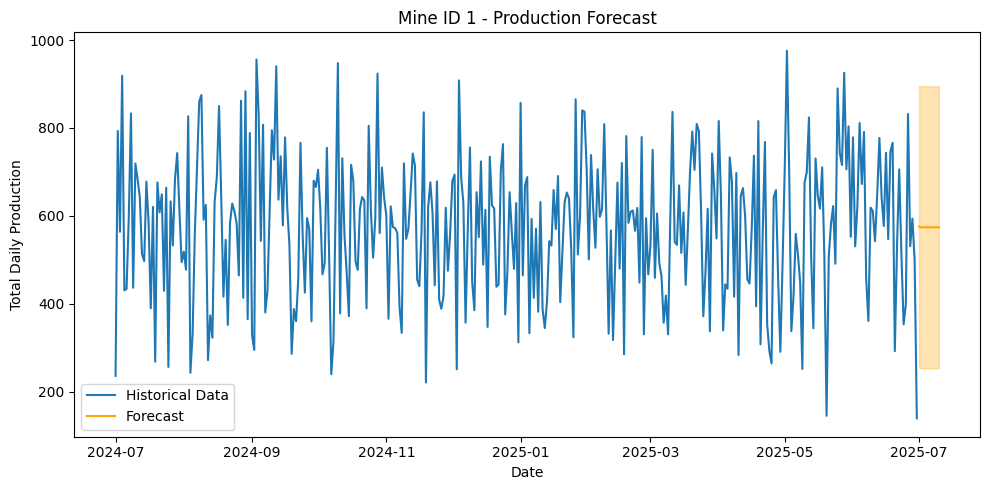

c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


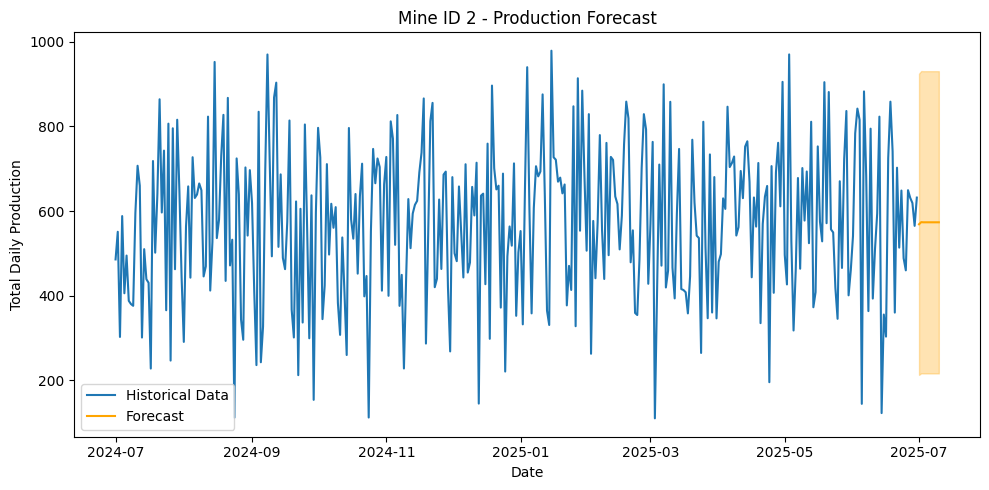

c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\allen\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


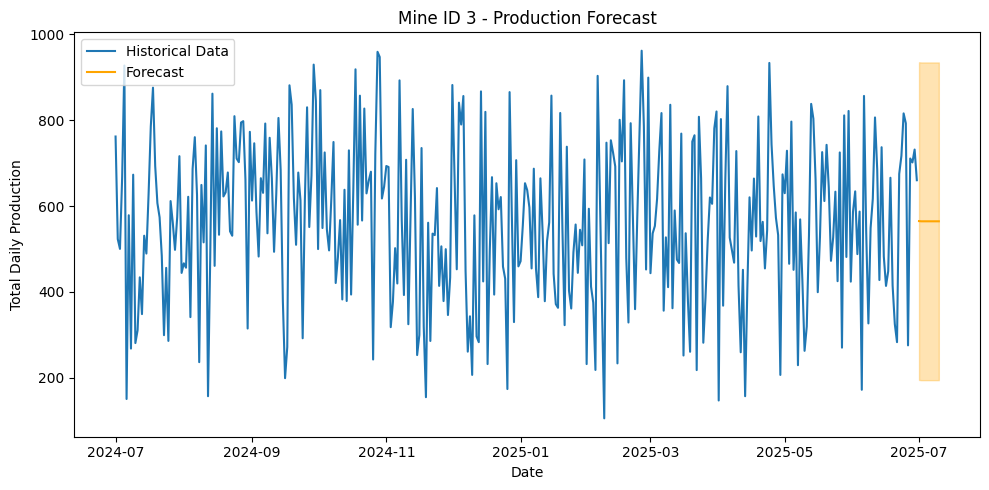

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

aggregated = merge_1.groupby(['mine_id', 'date'])['total_production_daily'].mean().reset_index()

# model for each mine_id
for mine in aggregated['mine_id'].unique():
    data = aggregated[aggregated['mine_id'] == mine].set_index('date')['total_production_daily']
    
    #arima
    model = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
    results = model.fit()
    
    #forecast next 10 days
    forecast = results.get_forecast(steps=10)
    predicted_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Create date range for forecast
    last_date = data.index[-1]
    forecast_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=10)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast_dates, predicted_mean, label='Forecast', color='orange')
    plt.fill_between(forecast_dates,
                     conf_int.iloc[:, 0],
                     conf_int.iloc[:, 1],
                     color='orange', alpha=0.3)
    
    plt.title(f"Mine ID {mine} - Production Forecast")
    plt.xlabel("Date")
    plt.ylabel("Total Daily Production")
    plt.legend()
    plt.tight_layout()
    plt.show()
